In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

# Problem 5

The best fit parameters are: k = -0.0292742807448023 and c = 1.2540120433428443


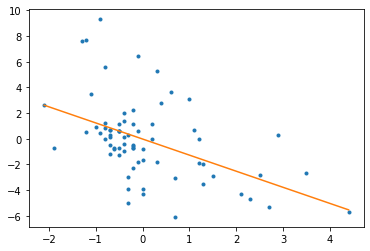

In [290]:
unem_df = pd.read_csv("UNRATE_annual_averages.csv", names=["Year", "Val"])
gdp_df = pd.read_csv("A191RL1A225NBEA.csv", names=["Year", "Val"])
unem_df["Change Unemployment Rate"] = unem_df["Val"].diff()
gdp_df["Change GDP Rate"] = gdp_df["Val"].diff()

unem_np = unem_df["Change Unemployment Rate"].to_numpy()[1:].reshape(-1, 1)
gdp_np = gdp_df["Change GDP Rate"].to_numpy()[19:].reshape(-1, 1)
A = np.hstack((np.ones(unem_np.shape), unem_np))
b = gdp_np

A_plus = np.linalg.pinv(A)
x = np.matmul(A_plus, b)
z = np.linspace(np.amin(unem_np), np.amax(unem_np), 100)

print("The best fit parameters are: k = " + str(x[0, 0]) + " and c = " + str(-x[1, 0]))

plt.plot(unem_np, gdp_np, '.')
plt.plot(z, x[0, 0]+x[1, 0]*z)
plt.show()

### This graph and best fit line show that as the change in unemployment increases, the change in GDP decreases whereas negative changes in the unemployment rate correspond with increases in GDP. This makes sense since you should expect the overall economy and productivity to increase when unemployment decreases, since more people will be working and contributing to the economy whereas the converse is also an observable phenomena.

# Problem 6

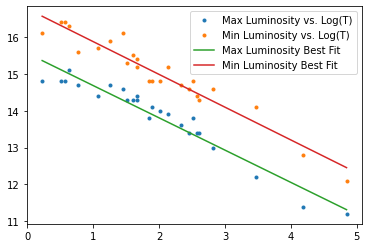

The best fit for Maximum Luminosity versus Log Period using least squares has r^2 value: 0.9338452664595926
The best fit for Minimum Luminosity versus Log Period using least squares has r^2 value: 0.9255261460427149


In [76]:
data = np.array([[14.8, 16.1, 1.25336], [14.8, 16.4, 1.6637], [14.8, 16.4, 1.762], [15.1, 16.3, 1.87502], [14.7, 15.6, 2.17352],
                    [14.4, 15.7, 2.913], [14.7, 15.9, 3.501], [14.6, 16.1, 4.2897], [14.3, 15.3, 4.547], [14.3, 15.5, 4.9866],
                    [14.4, 15.4, 5.311], [14.3, 15.2, 5.323], [13.8, 14.8, 6.2926], [14.1, 14.8, 6.65], [14, 14.8, 7.483],
                    [13.9, 15.2, 8.397], [13.6, 14.7, 10.336], [13.4, 14.6, 11.645], [13.8, 14.8, 12.417], [13.4, 14.4, 13.08],
                    [13.4, 14.3, 13.47], [13, 14.6, 16.75], [12.2, 14.1, 31.94], [11.4, 12.8, 65.8], [11.2, 12.1, 127]])

A = np.hstack((np.ones(data[:, 2].shape).reshape(-1, 1), np.log(data[:, 2]).reshape(-1, 1)))
b1 = data[:, 0]
b2 = data[:, 1]

A_plus1 = np.linalg.pinv(A)
x1 = np.matmul(A_plus1, b1)

A_plus2 = np.linalg.pinv(A)
x2 = np.matmul(A_plus2, b2)

z = np.linspace(np.amin(A[:, 1]), np.amax(A[:, 1]), 25)

num_1 = 0
num_2 = 0
denom_1 = 0
denom_2 = 0
for (x, y1, y2) in zip(A[:, 1], b1, b2):
    num_1 += (y1-(x1[0]+x1[1]*x))**2
    num_2 += (y2-(x2[0]+x2[1]*x))**2
    denom_1 += (y1-np.average(data[:, 0]))**2
    denom_2 += (y2-np.average(data[:, 1]))**2

r2_1 = 1-num_1/denom_1
r2_2 = 1-num_2/denom_2


plt.plot(A[:, 1], b1, '.')
plt.plot(A[:, 1], b2, '.')
plt.plot(z, x1[0]+x1[1]*z)
plt.plot(z, x2[0]+x2[1]*z)
plt.legend(["Max Luminosity vs. Log(T)", "Min Luminosity vs. Log(T)", "Max Luminosity Best Fit", "Min Luminosity Best Fit"])
plt.show()

print("The best fit for Maximum Luminosity versus Log Period using least squares has r^2 value: " + str(r2_1))
print("The best fit for Minimum Luminosity versus Log Period using least squares has r^2 value: " + str(r2_2))

/Users/rpenumarti/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-78-705333ec68df>:9: RuntimeWarning: invalid value encountered in double_scalars
  alpha = np.linalg.norm(loss)**2/np.dot(loss, h)


nan

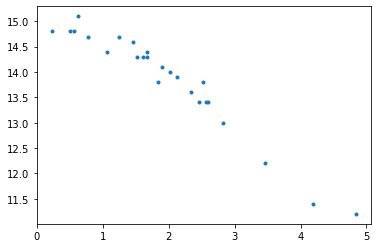

In [78]:
def gradient_descent(A_, b_, x_, n_iter, tol=1e-5):
    AT = A_.T
    n = b_.size
    for i in range(n_iter):
        h = np.dot(A, x_)
        loss = h - b_
        cost = np.sum(loss**2)/(2*n)
        grad = np.dot(AT, loss)/n
        alpha = np.linalg.norm(loss)**2/np.dot(loss, h)
        x_ = x_ - alpha*grad
    return x_

x_0 = np.ones(A[0].shape)
n_iter = 100000
alpha = 0.01
x = gradient_descent(A, b1, x_0, n_iter)
z = np.linspace(np.amin(A[:, 1]), np.amax(A[:, 1]), 25)

num_1 = 0
num_2 = 0

for (x_, y1) in zip(A[:, 1], b1):
    num_1 += (y1-(x[0]+x[1]*x_))**2
    denom_1 += (y1-np.average(data[:, 0]))**2

plt.plot(A[:, 1], b1, '.')
plt.plot(z, x[0]+x[1]*z)

r2_1 = 1-num_1/denom_1
r2_1

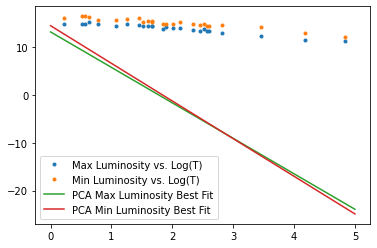

In [38]:
log_data = data.copy()
log_data[:, 2] = np.log(data[:, 2])

A = np.hstack((log_data[:, 0].reshape(-1, 1), log_data[:, 2].reshape(-1, 1)))
normalized_data = A/np.std(A, axis=0)

V1, D1, UT1 = np.linalg.svd(normalized_data)
proj_norm1 = D1[0]*np.matmul(V1[:1].T, UT1[:1])
z1 = np.linspace(0, 5)
proj1 = proj_norm1*np.std(A, axis=0)
slope1 = proj1[0, 0]/proj1[0, 1]
b1 = A[0, 0] - A[0, 1]*slope1

norm_log_data = log_data[:, 1:]/np.std(log_data[:, 1:], axis=0)
V2, D2, UT2 = np.linalg.svd(norm_log_data)
proj_norm2 = np.matmul(V2[:1].T, UT2[:1])
z2 = np.linspace(0, 5)
proj2 = proj_norm2*np.std(A, axis=0)
slope2 = proj2[0, 0]/proj2[0, 1]
b2 = log_data[0, 1] - log_data[0, 2]*slope1

plt.plot(A[:, 1], A[:, 0], '.')
plt.plot(log_data[:, 2], log_data[:, 1], '.')
plt.plot(z1, -z1*slope1+b1)
plt.plot(z2, -z2*slope2+b2)
plt.legend(["Max Luminosity vs. Log(T)", "Min Luminosity vs. Log(T)", "PCA Max Luminosity Best Fit", "PCA Min Luminosity Best Fit"])
plt.show()

# Problem 7

## Parts a), b), c)

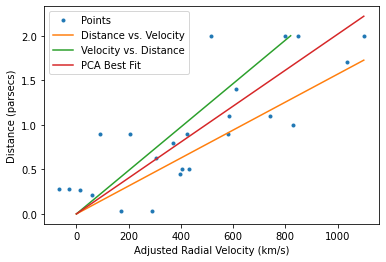

In [31]:
data = np.array([[0.032,170],[0.034,290],[0.214,60],[0.263,15],[0.275,-30],[0.275,-65],[0.45,395],[0.5,405],[0.5,430],[0.63,305],[0.8,370],
                [0.9,90],[0.9,580],[0.9,205],[0.9,425],[1,830],[1.1,585],[1.1,740],[1.4,610],[1.7,1035],[2,515],[2,850],[2,800],[2,1100]])

A1 = np.hstack((np.ones(data[:, 1].shape).reshape(-1, 1), data[:, 1].reshape(-1, 1)))
A1_p = np.linalg.pinv(A1)
x1 = np.matmul(A1_p, data[:, 0])

z1 = np.linspace(0, np.amax(A1[:, 1]), 100)

A2 = np.hstack((np.ones(data[:, 0].shape).reshape(-1, 1), data[:, 0].reshape(-1, 1)))
A2_p = np.linalg.pinv(A2)
x2 = np.matmul(A2_p, data[:, 1])

z2 = np.linspace(0, np.amax(A2[:, 1]), 100)

normalized_data = data/np.std(data, axis=0)
V, D, UT = np.linalg.svd(normalized_data)
proj_norm = D[0]*np.matmul(V[:1].T, UT[:1])
proj = proj_norm*np.std(data, axis=0)
z3 = np.linspace(0, np.amax(data[:, 1]))
slope = proj[0, 0]/proj[0, 1]

plt.plot(A1[:, 1], data[:, 0], '.')
plt.plot(z1, x1[1]*z1)
plt.plot(x2[1]*z2, z2)
plt.plot(z3, slope*z3)
plt.xlabel("Adjusted Radial Velocity (km/s)")
plt.ylabel("Distance (parsecs)")
plt.legend(["Points", "Distance vs. Velocity", "Velocity vs. Distance", "PCA Best Fit"])
plt.show()

### PCA is better than either regression model for analyzing the data because the data is not scaled similarly, so using PCA, we can easily use the principal components to explain this variance better than regression can which makes it better for analysis on this dataset.

# Problem 8

### Note, here I use the standard scaler function in the scikit-learn library which allows me to scale the data to a standard normal distribution (i.e. mean 0 and variance 1). I do this because the data is not similarly scaled and so it would benefit from scaling to standard normal.

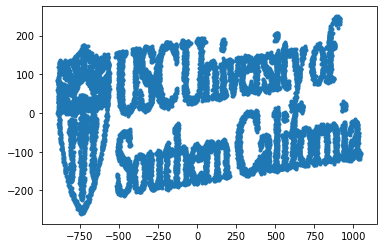

In [6]:
mat = loadmat("data.mat")['data']
normalized_data = mat - np.average(mat, axis=0)

V, D, UT = np.linalg.svd(normalized_data, full_matrices=False)

proj = np.matmul(normalized_data, UT[:2].T)
plt.plot(proj[:, 0], -proj[:, 1], '.')
plt.show()